<a href="https://colab.research.google.com/github/cedric-bit/MLP/blob/main/machineLearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-F-422 - Statistical Foundations of Machine Learning

In [ ]:
install.packages("ggplot2")
install.packages("mRMRe")
install.packages("dplyr")
library(ggplot2)
library(mRMRe)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(5)

In [ ]:
train.features <- read.csv(file="train_values.csv",stringsAsFactors = T, row.names = 1)
train.labels <- read.csv(file="train_labels.csv",stringsAsFactors = T, row.names = 1)
test.features <- read.csv(file="test_values.csv",stringsAsFactors = T, row.names = 1)


In [ ]:
str(train.labels)

'data.frame':	260601 obs. of  1 variable:
 $ damage_grade: int  3 2 3 2 3 2 3 1 2 1 ...


In [ ]:
str(train.features)

'data.frame':	260601 obs. of  38 variables:
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 2 3 3 3 3 1 3 3 3 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 5 3 2 ...
 $ roof_type                             : Factor w/ 3 levels "n","q","x": 1 1 1 1 1 1 1 2 2 1 ...
 $ ground_floor_type                     : Factor w/ 5 levels "f","m","v","x",..:

In [ ]:

summary(train.features)


 geo_level_1_id geo_level_2_id   geo_level_3_id  count_floors_pre_eq
 Min.   : 0.0   Min.   :   0.0   Min.   :    0   Min.   :1.00       
 1st Qu.: 7.0   1st Qu.: 350.0   1st Qu.: 3073   1st Qu.:2.00       
 Median :12.0   Median : 702.0   Median : 6270   Median :2.00       
 Mean   :13.9   Mean   : 701.1   Mean   : 6258   Mean   :2.13       
 3rd Qu.:21.0   3rd Qu.:1050.0   3rd Qu.: 9412   3rd Qu.:2.00       
 Max.   :30.0   Max.   :1427.0   Max.   :12567   Max.   :9.00       
                                                                    
      age         area_percentage   height_percentage land_surface_condition
 Min.   :  0.00   Min.   :  1.000   Min.   : 2.000    n: 35528              
 1st Qu.: 10.00   1st Qu.:  5.000   1st Qu.: 4.000    o:  8316              
 Median : 15.00   Median :  7.000   Median : 5.000    t:216757              
 Mean   : 26.54   Mean   :  8.018   Mean   : 5.434                          
 3rd Qu.: 30.00   3rd Qu.:  9.000   3rd Qu.: 6.000             

In [ ]:
get_var_type <- function(x) {
  if (is.factor(x)) {
    return("Categorical")
  } else if (length(unique(x)) == 2) {
    return("Binary")
  } else {
    return("Numerical")
  }
}

var_info <- data.frame(variable = names(train.features),
                       var_type = sapply(train.features, get_var_type),
                       count = sapply(train.features, function(x) length(unique(x))))

var_types <- sapply(train.features, get_var_type)

# Comptez le nombre de variables de chaque type
type_counts <- table(var_types)
type_counts


var_types
     Binary Categorical   Numerical 
         22           8           8 

* feature engineering

It is important to note that the building_id variable itself has no predictive value and should not be included as a feature in our prediction model

In [ ]:
factor_variables<-which(sapply(test.features[1,],class)=="factor")
factor_variables

land_surface_condition        foundation_type              roof_type 
                     8                      9                     10 
     ground_floor_type       other_floor_type               position 
                    11                     12                     13 
    plan_configuration legal_ownership_status 
                    14                     26

In [ ]:
data_factor<-test.features[,factor_variables]
dim(data_factor)

[1] 86868     8

In [ ]:
data_factor<-train.features[,factor_variables]
dim(data_factor)

[1] 260601      8

In [ ]:
data_factor[1:2,]

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
802906,t,r,n,f,q,t,d,v
28830,o,r,n,x,q,s,d,v


In [ ]:
# Initialiser une nouvelle colonne 'fragile_building' avec des zéros
train.features$fragile_building <- 0
# Parcourir chaque ligne du dataframe et déterminer si le bâtiment est fragile
for (i in 1:nrow(train.features)) {
  if (train.features[i, "has_superstructure_adobe_mud"] == 1 |
      train.features[i, "has_superstructure_mud_mortar_stone"] == 1 |
      train.features[i, "has_superstructure_mud_mortar_brick"] == 1) {
    train.features[i, "fragile_building"] <- 1
  }
}

# Initialiser une nouvelle colonne 'fragile_building' avec des zéros
test.features$fragile_building <- 0
# Parcourir chaque ligne du dataframe et déterminer si le bâtiment est fragile
for (i in 1:nrow(test.features)) {
  if (test.features[i, "has_superstructure_adobe_mud"] == 1 |
      test.features[i, "has_superstructure_mud_mortar_stone"] == 1 |
      test.features[i, "has_superstructure_mud_mortar_brick"] == 1) {
      test.features[i, "fragile_building"] <- 1
  }
}


In [ ]:
num_fragile_buildings <- sum(train.features$fragile_building)

print(num_fragile_buildings)
total_buildings <- nrow(train.features)
num_non_fragile_buildings <- total_buildings - num_fragile_buildings
print(num_non_fragile_buildings)


[1] 222380
[1] 38221


In [ ]:
num_fragile_buildings <- sum(test.features$fragile_building)

print(num_fragile_buildings)
total_buildings <- nrow(test.features)
num_non_fragile_buildings <- total_buildings - num_fragile_buildings
print(num_non_fragile_buildings)

[1] 74184
[1] 12684


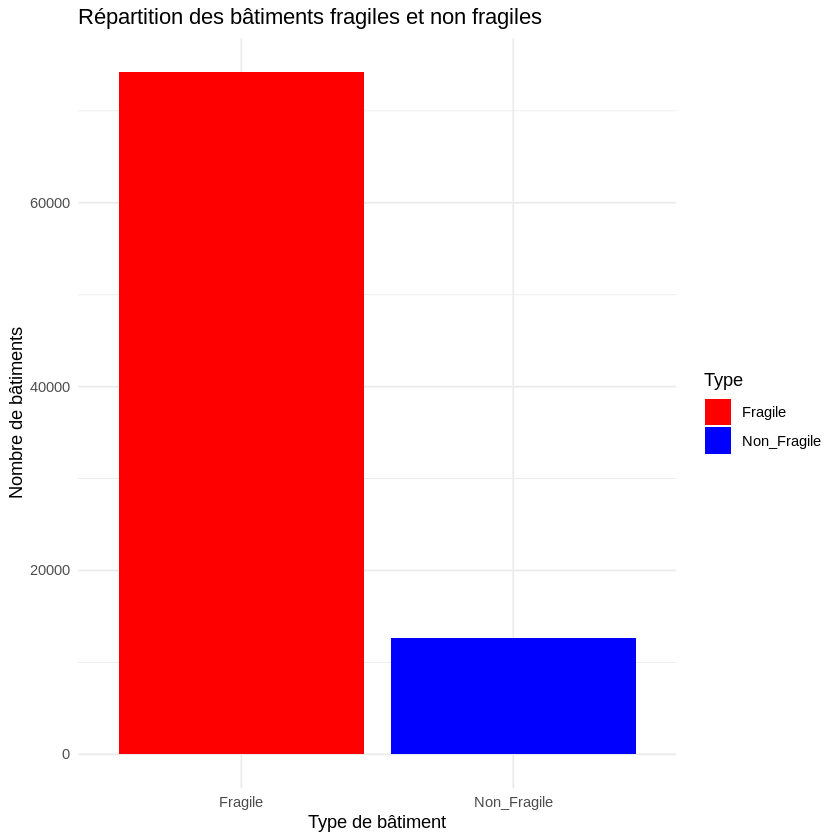

In [ ]:
fragile_data <- data.frame(
  Type = c("Fragile", "Non_Fragile"),
  Count = c(num_fragile_buildings, num_non_fragile_buildings)
)

ggplot(fragile_data, aes(x = Type, y = Count, fill = Type)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Répartition des bâtiments fragiles et non fragiles",
       x = "Type de bâtiment",
       y = "Nombre de bâtiments") +
  scale_fill_manual(values = c("red", "blue"))


In [ ]:
dim(train.features)

[1] 260601     39

In [ ]:
# Créer les catégories pour la variable "age"
train.features$age_category <- cut(train.features$age, 
                                   breaks = c(-Inf, 10, 50, Inf), 
                                   labels = c("jeune", "moyen", "ancien"))

# Convertir la variable en facteur
train.features$age_category <- as.factor(train.features$age_category)

# Créer les catégories pour la variable "age"
test.features$age_category <- cut(test.features$age, 
                                   breaks = c(-Inf, 10, 50, Inf), 
                                   labels = c("jeune", "moyen", "ancien"))

# Convertir la variable en facteur
test.features$age_category <- as.factor(test.features$age_category)

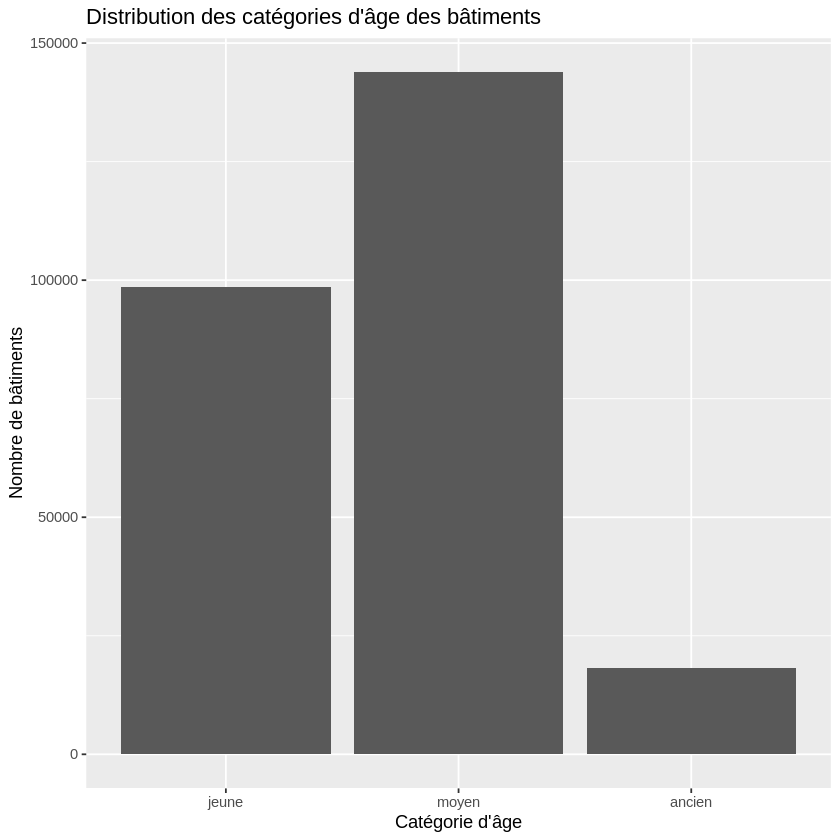

In [ ]:
# Créer un diagramme à barres pour visualiser la distribution des catégories d'âge
age_bar_plot <- ggplot(train.features, aes(x = age_category)) +
  geom_bar() +
  xlab("Catégorie d'âge") +
  ylab("Nombre de bâtiments") +
  ggtitle("Distribution des catégories d'âge des bâtiments")

# Afficher le diagramme à barres
print(age_bar_plot)


In [ ]:
dim(test.features)
head(train.features)

[1] 86868    40

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,⋯,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,fragile_building,age_category
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
802906,6,487,12198,2,30,6,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,moyen
28830,8,900,2812,2,10,8,7,o,r,n,⋯,0,0,0,0,0,0,0,0,1,jeune
94947,21,363,8973,2,10,5,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,jeune
590882,22,418,10694,2,10,6,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,jeune
201944,11,131,1488,3,30,8,9,t,r,n,⋯,0,0,0,0,0,0,0,0,1,moyen
333020,8,558,6089,2,10,9,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,jeune


In [ ]:

head(test.features)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,⋯,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,fragile_building,age_category
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
300051,17,596,11307,3,20,7,6,t,r,n,⋯,0,0,0,0,0,0,0,0,1,moyen
99355,6,141,11987,2,25,13,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,moyen
890251,22,19,10044,2,5,4,5,t,r,n,⋯,0,0,0,0,0,0,0,0,1,jeune
745817,26,39,633,1,0,19,3,t,r,x,⋯,1,0,0,0,0,0,0,0,0,jeune
421793,17,289,7970,3,15,8,7,t,r,q,⋯,0,0,0,0,0,0,0,0,1,moyen
871976,22,170,4029,1,55,4,3,t,r,q,⋯,0,0,0,0,0,0,0,0,1,ancien


In [ ]:
onehot_encoding <- function(df) {
  for (colname in colnames(df)) {
    if (class(df[[colname]]) == "factor") {
      cat("Encodage one-hot pour la colonne", colname, "\n")
      dummy_cols <- model.matrix(~ df[[colname]] - 1) # Créer des colonnes binaires
      colnames(dummy_cols) <- paste(colname, levels(df[[colname]]), sep="_") # Renommer les colonnes
      df <- cbind(df, dummy_cols) # Ajouter les colonnes binaires au dataframe
      df[[colname]] <- NULL # Supprimer la colonne catégorielle originale
    }
  }
  return(df)
}



In [ ]:
encoded_train_features <- onehot_encoding(train.features)
encoded_test_features <- onehot_encoding(test.features)


Encodage one-hot pour la colonne land_surface_condition 
Encodage one-hot pour la colonne foundation_type 
Encodage one-hot pour la colonne roof_type 
Encodage one-hot pour la colonne ground_floor_type 
Encodage one-hot pour la colonne other_floor_type 
Encodage one-hot pour la colonne position 
Encodage one-hot pour la colonne plan_configuration 
Encodage one-hot pour la colonne legal_ownership_status 
Encodage one-hot pour la colonne age_category 
Encodage one-hot pour la colonne land_surface_condition 
Encodage one-hot pour la colonne foundation_type 
Encodage one-hot pour la colonne roof_type 
Encodage one-hot pour la colonne ground_floor_type 
Encodage one-hot pour la colonne other_floor_type 
Encodage one-hot pour la colonne position 
Encodage one-hot pour la colonne plan_configuration 
Encodage one-hot pour la colonne legal_ownership_status 
Encodage one-hot pour la colonne age_category 


In [ ]:
dim(encoded_train_features)

[1] 260601     72

In [ ]:
head(encoded_train_features)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,⋯,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,age_category_jeune,age_category_moyen,age_category_ancien
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
802906,6,487,12198,2,30,6,5,1,1,0,⋯,0,0,0,0,0,1,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
94947,21,363,8973,2,10,5,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
590882,22,418,10694,2,10,6,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
201944,11,131,1488,3,30,8,9,1,0,0,⋯,0,0,0,0,0,1,0,0,1,0
333020,8,558,6089,2,10,9,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0


In [ ]:
summary(encoded_train_features)

 geo_level_1_id geo_level_2_id   geo_level_3_id  count_floors_pre_eq
 Min.   : 0.0   Min.   :   0.0   Min.   :    0   Min.   :1.00       
 1st Qu.: 7.0   1st Qu.: 350.0   1st Qu.: 3073   1st Qu.:2.00       
 Median :12.0   Median : 702.0   Median : 6270   Median :2.00       
 Mean   :13.9   Mean   : 701.1   Mean   : 6258   Mean   :2.13       
 3rd Qu.:21.0   3rd Qu.:1050.0   3rd Qu.: 9412   3rd Qu.:2.00       
 Max.   :30.0   Max.   :1427.0   Max.   :12567   Max.   :9.00       
      age         area_percentage   height_percentage
 Min.   :  0.00   Min.   :  1.000   Min.   : 2.000   
 1st Qu.: 10.00   1st Qu.:  5.000   1st Qu.: 4.000   
 Median : 15.00   Median :  7.000   Median : 5.000   
 Mean   : 26.54   Mean   :  8.018   Mean   : 5.434   
 3rd Qu.: 30.00   3rd Qu.:  9.000   3rd Qu.: 6.000   
 Max.   :995.00   Max.   :100.000   Max.   :32.000   
 has_superstructure_adobe_mud has_superstructure_mud_mortar_stone
 Min.   :0.00000              Min.   :0.0000                     
 1st Qu

In [ ]:
head(encoded_train_features)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,⋯,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,age_category_jeune,age_category_moyen,age_category_ancien
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
802906,6,487,12198,2,30,6,5,1,1,0,⋯,0,0,0,0,0,1,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
94947,21,363,8973,2,10,5,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
590882,22,418,10694,2,10,6,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
201944,11,131,1488,3,30,8,9,1,0,0,⋯,0,0,0,0,0,1,0,0,1,0
333020,8,558,6089,2,10,9,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0


In [ ]:
head(encoded_test_features) 

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,⋯,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,age_category_jeune,age_category_moyen,age_category_ancien
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
300051,17,596,11307,3,20,7,6,0,1,0,⋯,0,0,0,0,0,1,0,0,1,0
99355,6,141,11987,2,25,13,5,0,1,0,⋯,0,0,0,0,0,1,0,0,1,0
890251,22,19,10044,2,5,4,5,0,1,0,⋯,0,0,0,0,0,1,0,1,0,0
745817,26,39,633,1,0,19,3,0,0,0,⋯,0,0,0,0,0,1,0,1,0,0
421793,17,289,7970,3,15,8,7,0,1,0,⋯,0,0,0,0,0,1,0,0,1,0
871976,22,170,4029,1,55,4,3,0,1,0,⋯,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Remove the building_id column
#data_test <- encoded_test_features %>% select(-building_id)
#data_train <- encoded_test_features %>% select(-building_id)


In [ ]:
dim(encoded_train_features )
dim(train.labels)

[1] 260601     72

[1] 260601      1

* Feature selection



The minimum-Redundancy Maximum-Relevance (mRMR) approach is a feature selection technique based on mutual information. It aims to choose a subset of features that are highly relevant to the target variable while having low redundancy among themselves. This is achieved by maximizing the mutual information between the features and the target variable while minimizing the mutual information among the features







In [ ]:

N<-nrow(encoded_train_features)
n<-ncol(encoded_train_features)
n
N

[1] 72

[1] 260601

In [ ]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)
selected_nb_features <- 20
CV_err<-matrix(0,nrow=selected_nb_features,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-encoded_train_features[idx_ts,]
    Y_ts<-train.labels$damage_grade[idx_ts]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-encoded_train_features[idx_tr,]
    Y_tr<-train.labels$damage_grade[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:selected_nb_features) {
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],damage_grade=Y_tr)
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:selected_nb_features)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))



 [1] "#Features:  1  ; CV error= 0.3215  ; std dev= 0.0019" 
 [2] "#Features:  2  ; CV error= 0.3171  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3136  ; std dev= 0.0019" 
 [4] "#Features:  4  ; CV error= 0.3135  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3132  ; std dev= 0.0018" 
 [6] "#Features:  6  ; CV error= 0.3129  ; std dev= 0.0018" 
 [7] "#Features:  7  ; CV error= 0.3127  ; std dev= 0.0018" 
 [8] "#Features:  8  ; CV error= 0.3127  ; std dev= 0.0018" 
 [9] "#Features:  9  ; CV error= 0.3126  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3124  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3109  ; std dev= 0.0018"
[12] "#Features:  12  ; CV error= 0.3096  ; std dev= 0.0018"
[13] "#Features:  13  ; CV error= 0.3096  ; std dev= 0.0019"
[14] "#Features:  14  ; CV error= 0.3095  ; std dev= 0.0018"
[15] "#Features:  15  ; CV error= 0.3095  ; std dev= 0.0018"
[16] "#Features:  16  ; CV error= 0.3095  ; std dev= 0.0018"
[17] "#Features:  17  ; 

In [ ]:
# Imprimer les noms des variables les plus corrélées avec la sortie
variable_names <- names(X_tr)[correlation_ranking_idx[1:nb_features]]
print(paste("Features:", variable_names))
#correlation_ranking_idx

 [1] "Features: fragile_building"                      
 [2] "Features: foundation_type_r"                     
 [3] "Features: ground_floor_type_v"                   
 [4] "Features: has_superstructure_mud_mortar_stone"   
 [5] "Features: roof_type_x"                           
 [6] "Features: foundation_type_i"                     
 [7] "Features: has_superstructure_cement_mortar_brick"
 [8] "Features: ground_floor_type_f"                   
 [9] "Features: other_floor_type_s"                    
[10] "Features: has_superstructure_rc_engineered"      
[11] "Features: foundation_type_w"                     
[12] "Features: age_category_jeune"                    
[13] "Features: other_floor_type_q"                    
[14] "Features: has_superstructure_rc_non_engineered"  
[15] "Features: age_category_moyen"                    
[16] "Features: foundation_type_u"                     
[17] "Features: other_floor_type_j"                    
[18] "Features: area_percentage"                

In [ ]:


CV_folds <- 10
n_variables <- 20

N <- nrow(encoded_train_features)
n <- ncol(encoded_train_features)

size_CV <- floor(N / CV_folds)

CV_err <- matrix(0, nrow = n_variables, ncol = CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))
    X_ts <- encoded_train_features[idx_ts,]
    Y_ts <- train.labels$damage_grade[idx_ts]
    
    idx_tr <- setdiff(1:N, idx_ts)
    X_tr <- encoded_train_features[idx_tr,]
    Y_tr <- train.labels$damage_grade[idx_tr]
    
    correlation <- abs(cor(X_tr, Y_tr))
    
    selected <- c()
    candidates <- 1:n
    
    for (j in 1:n_variables) {
        redundancy_score <- numeric(length(candidates))
        
        if (length(selected) > 0) {
            cor_selected_candidates <- cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F])
            redundancy_score <- apply(cor_selected_candidates, 2, mean)
        }
        
        mRMR_score <- correlation[candidates] - redundancy_score
        selected_current <- candidates[which.max(mRMR_score)]
        selected <- c(selected, selected_current)
        candidates <- setdiff(candidates, selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n_variables) {
        DS <- cbind(X_tr[, ranking[1:nb_features], drop = F], damage_grade = Y_tr)
       # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ", c(1:n_variables), " ; CV error=", round(apply(CV_err, 1, mean), digits = 4), " ; std dev=", round(apply(CV_err, 1, sd), digits = 4)))

CV_err_svm_single_model_fs <- CV_err


 [1] "#Features:  1  ; CV error= 0.3215  ; std dev= 0.0019" 
 [2] "#Features:  2  ; CV error= 0.3169  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3141  ; std dev= 0.0019" 
 [4] "#Features:  4  ; CV error= 0.313  ; std dev= 0.0019"  
 [5] "#Features:  5  ; CV error= 0.3121  ; std dev= 0.0019" 
 [6] "#Features:  6  ; CV error= 0.3121  ; std dev= 0.0019" 
 [7] "#Features:  7  ; CV error= 0.3118  ; std dev= 0.0019" 
 [8] "#Features:  8  ; CV error= 0.3118  ; std dev= 0.0019" 
 [9] "#Features:  9  ; CV error= 0.3111  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3111  ; std dev= 0.0019"
[11] "#Features:  11  ; CV error= 0.311  ; std dev= 0.0019" 
[12] "#Features:  12  ; CV error= 0.3107  ; std dev= 0.0019"
[13] "#Features:  13  ; CV error= 0.3104  ; std dev= 0.0019"
[14] "#Features:  14  ; CV error= 0.3093  ; std dev= 0.0019"
[15] "#Features:  15  ; CV error= 0.3093  ; std dev= 0.0019"
[16] "#Features:  16  ; CV error= 0.3076  ; std dev= 0.0018"
[17] "#Features:  17  ; 

In [ ]:

selected_variable_names <- colnames(encoded_train_features)[ranking]

print(selected_variable_names)
print(ranking)


 [1] "fragile_building"                      
 [2] "ground_floor_type_v"                   
 [3] "foundation_type_w"                     
 [4] "foundation_type_r"                     
 [5] "roof_type_x"                           
 [6] "ground_floor_type_f"                   
 [7] "has_superstructure_cement_mortar_brick"
 [8] "has_superstructure_mud_mortar_stone"   
 [9] "foundation_type_i"                     
[10] "foundation_type_u"                     
[11] "other_floor_type_q"                    
[12] "other_floor_type_j"                    
[13] "other_floor_type_s"                    
[14] "age_category_jeune"                    
[15] "age_category_moyen"                    
[16] "count_floors_pre_eq"                   
[17] "has_superstructure_rc_engineered"      
[18] "roof_type_n"                           
[19] "roof_type_q"                           
[20] "has_superstructure_rc_non_engineered"  
 [1] 31 45 39 37 42 43 13  9 36 38 49 48 50 70 71  4 17 40 41 16


In [ ]:
X_train_selected <- encoded_train_features[, selected_variable_names]
head(X_train_selected)

,fragile_building,ground_floor_type_v,foundation_type_w,foundation_type_r,roof_type_x,ground_floor_type_f,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_stone,foundation_type_i,foundation_type_u,other_floor_type_q,other_floor_type_j,other_floor_type_s,age_category_jeune,age_category_moyen,count_floors_pre_eq,has_superstructure_rc_engineered,roof_type_n,roof_type_q,has_superstructure_rc_non_engineered
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
802906,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,2,0,1,0,0
28830,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,2,0,1,0,0
94947,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,2,0,1,0,0
590882,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,2,0,1,0,0
201944,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,0,1,0,0
333020,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,2,0,1,0,0


In [ ]:
Y_train <- train.labels$damage_grade
data_training <- cbind(X_train_selected, damage_grade = Y_train)
dim(data_training)
head(Y_train) 


[1] 260601     21

[1] 3 2 3 2 3 2

In [ ]:

CV_folds <- 10
#n_variables <- 20


size_CV <- floor(N / CV_folds)

CV_err <- matrix(0, nrow = n, ncol = CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))
    X_ts <- encoded_train_data[idx_ts,]
    Y_ts <- train_labels$damage_grade[idx_ts]
    
    idx_tr <- setdiff(1:N, idx_ts)
    X_tr <- encoded_train_data[idx_tr,]
    Y_tr <- train_labels$damage_grade[idx_tr]
    
    correlation <- abs(cor(X_tr, Y_tr))
    
    selected <- c()
    candidates <- 1:n
    
    for (j in 1:n) {
        redundancy_score <- numeric(length(candidates))
        
        if (length(selected) > 0) {
            cor_selected_candidates <- cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F])
            redundancy_score <- apply(cor_selected_candidates, 2, mean)
        }
        
        mRMR_score <- correlation[candidates] - redundancy_score
        selected_current <- candidates[which.max(mRMR_score)]
        selected <- c(selected, selected_current)
        candidates <- setdiff(candidates, selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        DS <- cbind(X_tr[, ranking[1:nb_features], drop = F], damage_grade = Y_tr)
       # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ", c(1:n), " ; CV error=", round(apply(CV_err, 1, mean), digits = 4), " ; std dev=", round(apply(CV_err, 1, sd), digits = 4)))

CV_err_svm_single_model_fs <- CV_err


In [ ]:
CV_folds <- 10
#PCA
size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(encoded_train_data,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-train_labels$damage_grade[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-train_labels$damage_grade[idx_tr]         
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features principal components
        DS<-cbind(X_tr[,1:nb_features,drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model predict
        Y_hat_ts<- predict(model,X_ts[,1:nb_features,drop=F])
        
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ;  std dev=",round(apply(CV_err,1,sd),digits=4)))

In [ ]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)
#selected_nb_features <- 69
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-encoded_train_data[idx_ts,]
    Y_ts<-train_labels$damage_grade[idx_ts]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-encoded_train_data[idx_tr,]
    Y_tr<-train_labels$damage_grade[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:n) {
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],damage_grade=Y_tr)
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

variable_names <- names(X_tr)[correlation_ranking_idx[1:nb_features]]
print(paste(variable_names))
correlation_ranking_idx